In [21]:
strategy_name = '培宏量化1号'
inTime = 241
otTime = 600
tradeArea = [inTime, otTime]
maxD = 4
offStart = ('close_mtx',0)

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


从tradesUsed cache中踢出 20201123
从tradesUsed cache中踢出 20201123
从tradesUsed cache中踢出 20201123
从tradesUsed cache中踢出 20201120
从trades cache中踢出 20201123
从trades cache中踢出 20201123
从trades cache中踢出 20201123
从trades cache中踢出 20201120
培宏量化1号 最后完整日期 20201118 新增记录 4 总记录 1087
['净利润增速连续三年大于20%', '季度净利润连续三年大于1亿', '跳空高开', '突破1年新高(开盘)', '突破3个月新高(开盘)', '均线多头排列', 'MACD的DIFF高于DEA', 'MACD的DIFF大于0', '交易量放大2倍', '流通市值大于100亿', '流通市值大于250亿', '流通市值大于500亿', '流通市值小于100亿', '流通市值小于50亿', '流通市值小于25亿', 'KDJ金叉', '十大股东持股比例小于20%', '十大股东持股比例20%~50%', '十大股东持股比例50%~80%', '十大股东持股比例大于80%', '交通运输', '休闲服务', '传媒', '公用事业', '农林牧渔', '化工', '医药生物', '商业贸易', '国防军工', '家用电器', '建筑材料', '建筑装饰', '房地产', '有色金属', '机械设备', '汽车', '电子', '电气设备', '纺织服装', '综合', '计算机', '轻工制造', '通信', '采掘', '钢铁', '银行', '非银金融', '食品饮料']
盈利前10%交易 净利润增速连续三年大于20% 7.34
盈利前10%交易 季度净利润连续三年大于1亿 26.61
盈利前10%交易 跳空高开 99.08
盈利前10%交易 突破1年新高(开盘) 0.92
盈利前10%交易 突破3个月新高(开盘) 16.51
盈利前10%交易 均线多头排列 63.3
盈利前10%交易 MACD的DIFF高于DEA 18.35
盈利前10%交易 MACD的DIFF大于0 63.3
盈利前10%交易 交易量放大2倍 49.54
盈利前10%交易 流通

SyntaxError: EOL while scanning string literal (rschLib.py, line 457)

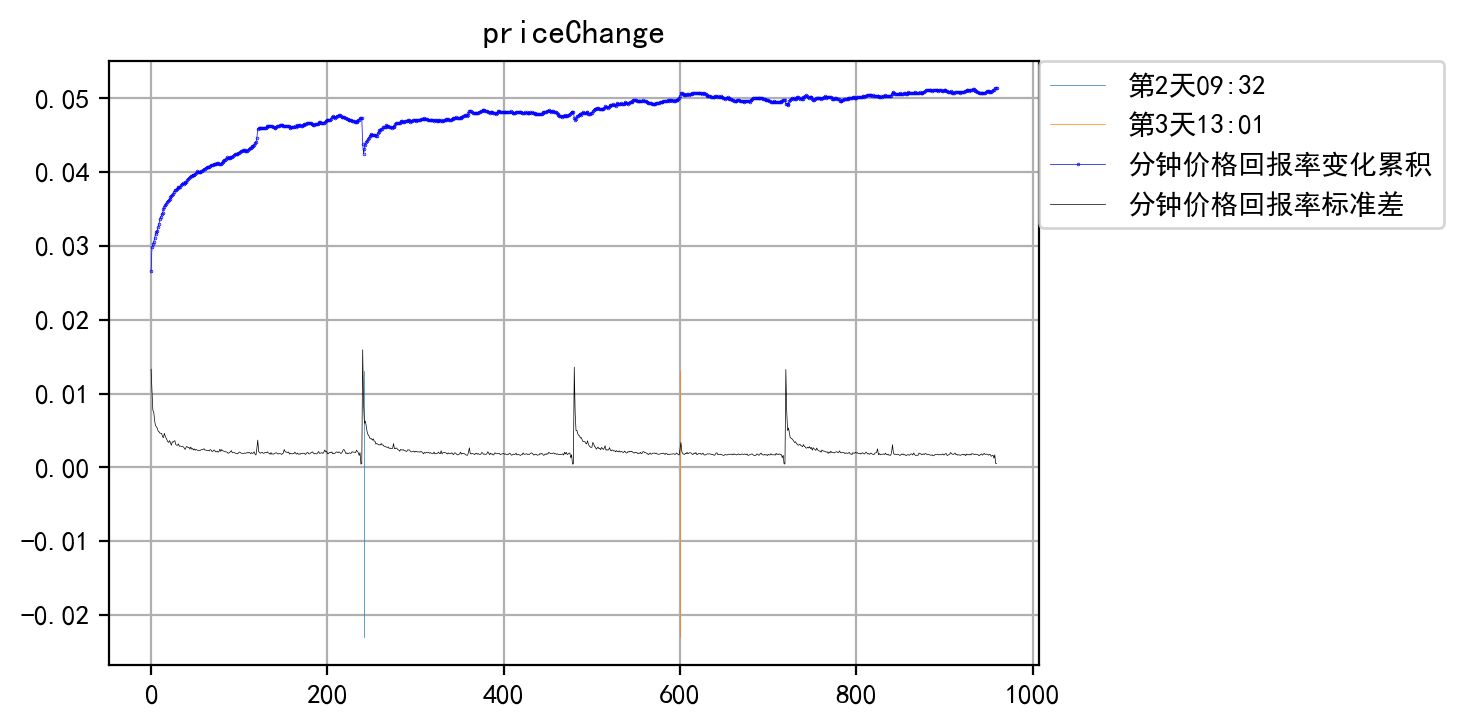

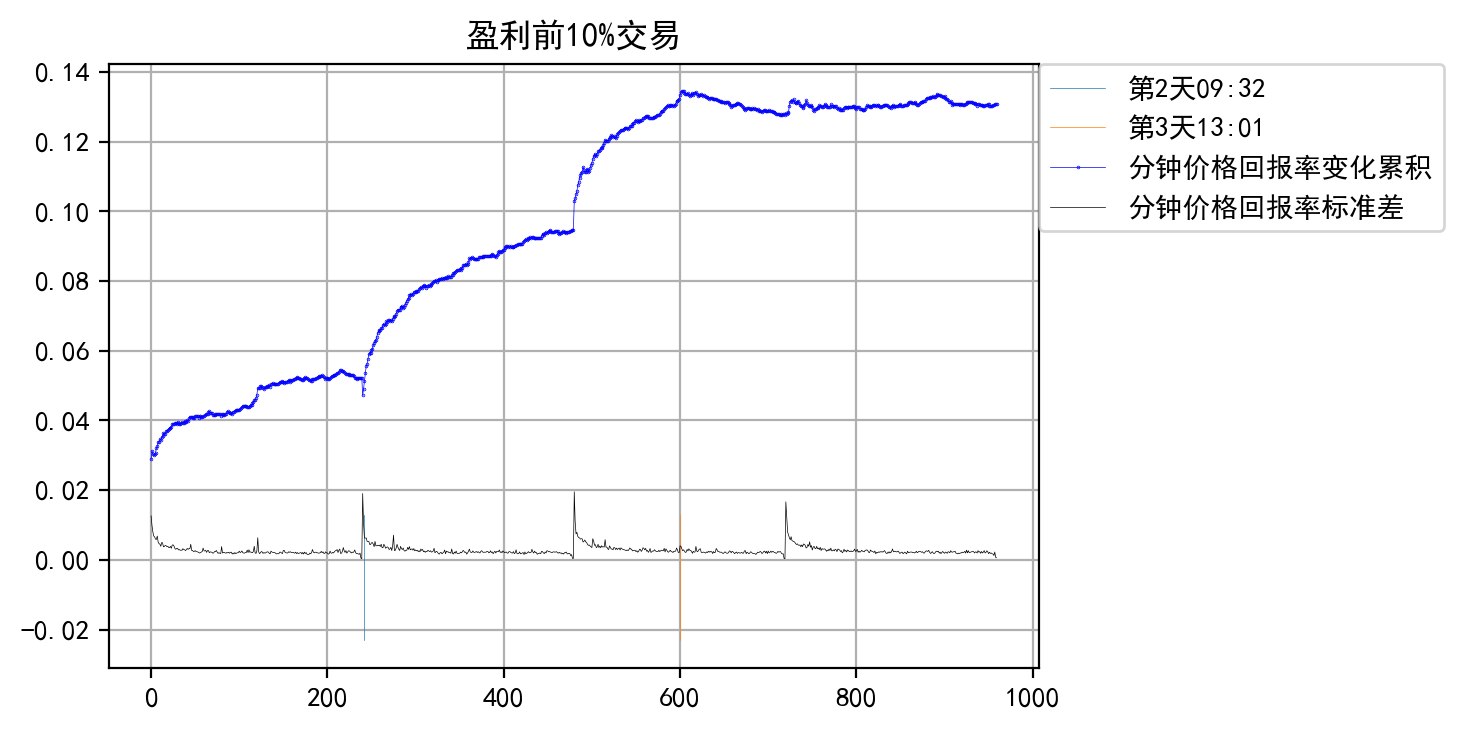

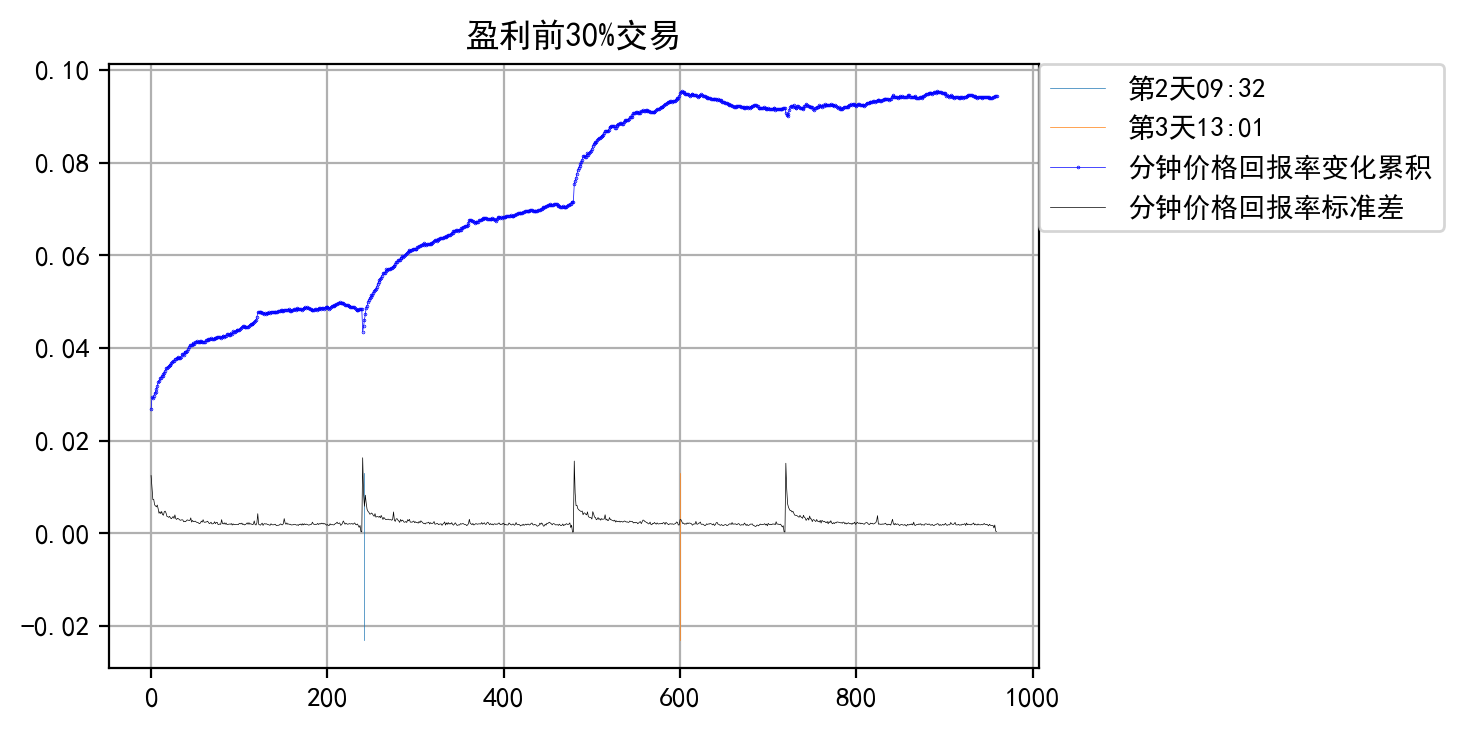

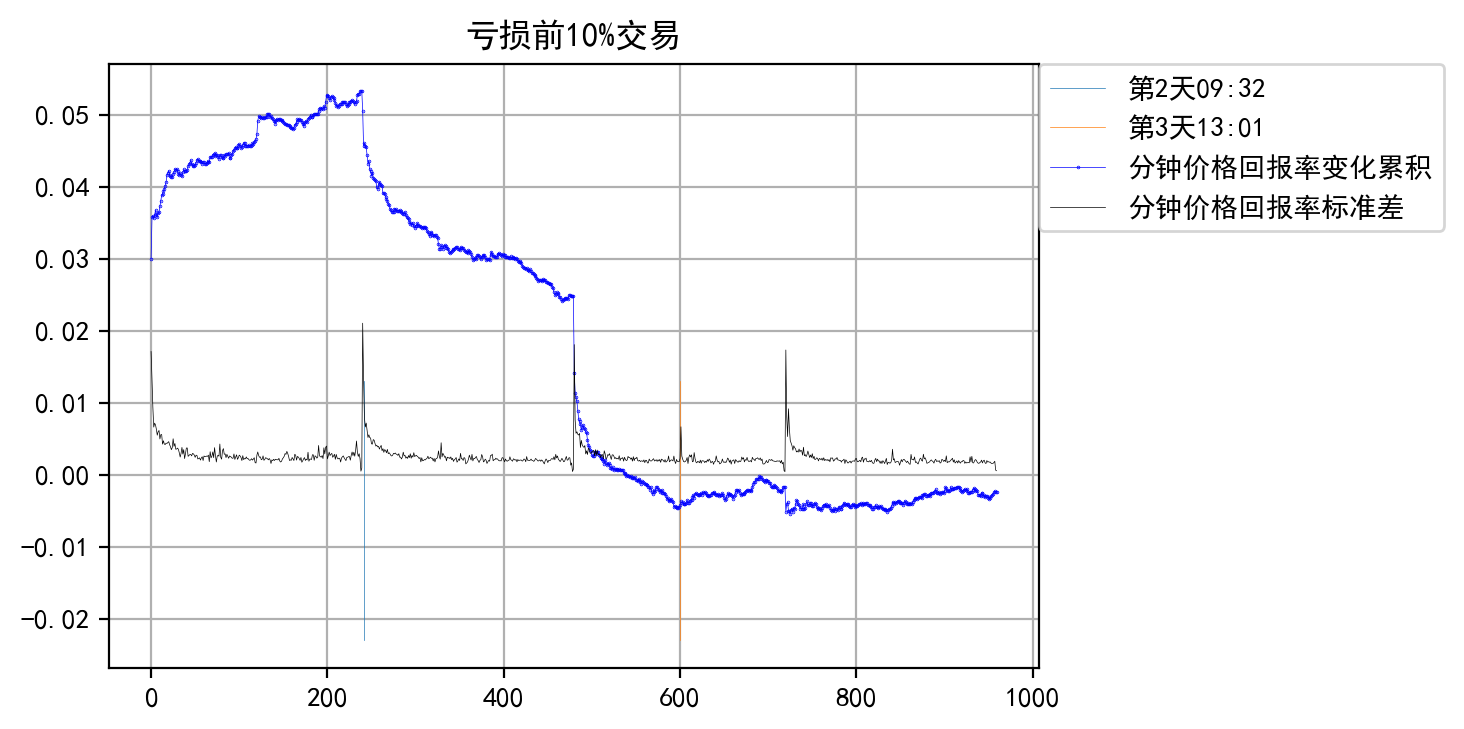

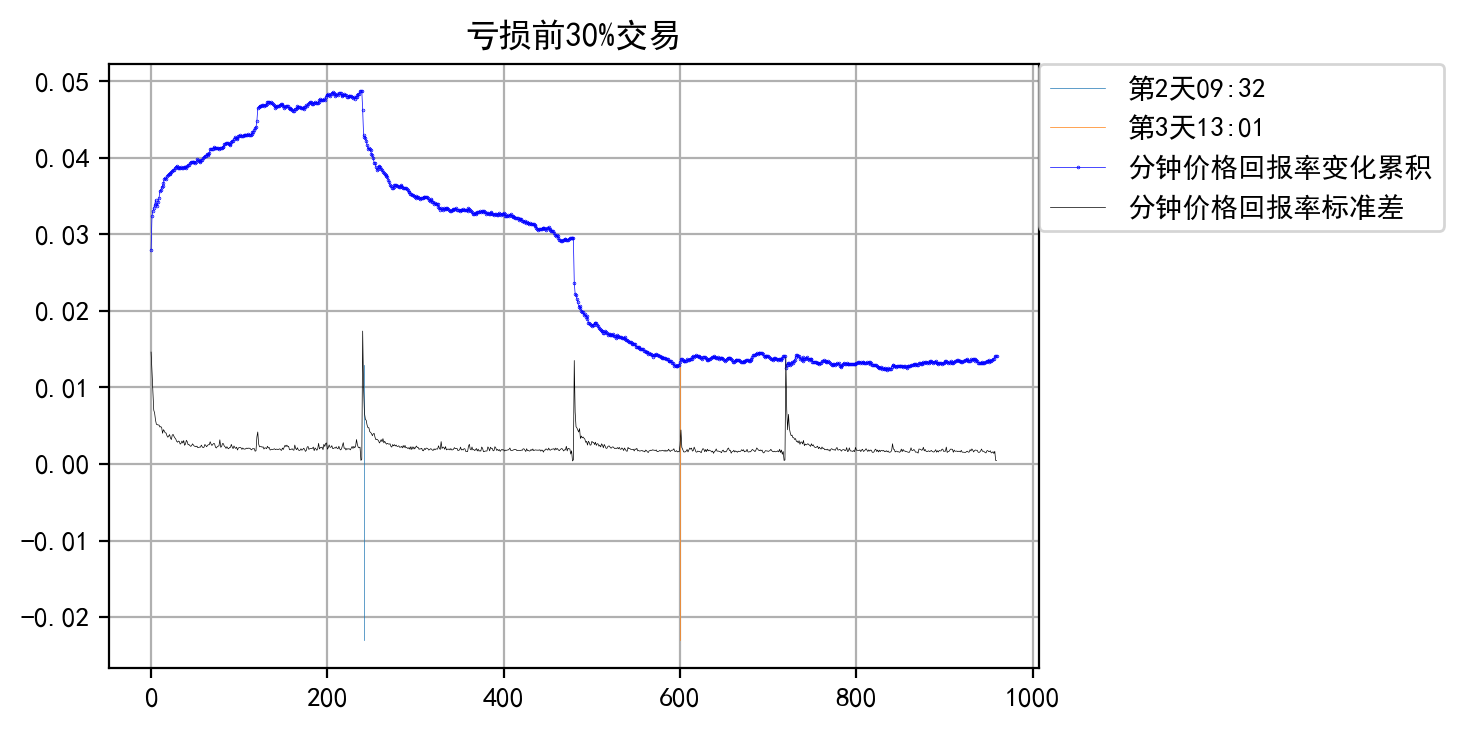

In [22]:
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\coresearch\funcs")
import pymongo
import numpy as np
import pickle
import time
import datetime
import copy
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import importlib
import rschLib
np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
dbt = rschLib.db_tinySoftData()
dtes, tkrs, name, open_mtx, high_mtx, low_mtx, close_mtx,belong, shenwan1, shenwan2, shenwan3, vol_mtx, amount_mtx = rschLib.loadDailyBarMtx()
# get time labels
timeAsFloat, timeLabels, maxM, dayOff, dayTimeAsFloat = rschLib.getTimeLabels(maxD)
# get trades
R = open_mtx[:, 1:]/close_mtx[:,:-1]-1  #使用收盘到开盘的回报率来修正分红和拆股
R = np.hstack((np.zeros((R.shape[0],1)), R))
tradesUsed, r_withnan = rschLib.getTradesFast(strategy_name, name, tkrs, dtes, maxD, dayTimeAsFloat, R)

# get trade samples by good/bad trades
tradeArea=[inTime,otTime]
idxTradable = np.isfinite(r_withnan[:,tradeArea[0]])
r = r_withnan.copy()
r[np.isfinite(r)==False]=0

result = rschLib.getTradeAnalysisSampleGroups(r, idxTradable, tradeArea)

# draw price change
rschLib.drawPriceChange(r[idxTradable,:], strategy_name, timeLabels=timeLabels, tp=tradeArea)
rschLib.drawPriceChange(result['rGood10'], strategy_name, timeLabels=timeLabels, title='盈利前10%交易', tp=tradeArea)
#rschLib.drawPriceChange(result['rGood20'], strategy_name, timeLabels=timeLabels, title='盈利前20%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rGood30'], strategy_name, timeLabels=timeLabels, title='盈利前30%交易', tp=tradeArea)
rschLib.drawPriceChange(result['rBad10'], strategy_name, timeLabels=timeLabels, title='亏损前10%交易',  tp=tradeArea)
#rschLib.drawPriceChange(result['rBad20'], strategy_name, timeLabels=timeLabels, title='亏损前20%交易',  tp=tradeArea)
rschLib.drawPriceChange(result['rBad30'], strategy_name, timeLabels=timeLabels, title='亏损前30%交易',  tp=tradeArea)


# analyze tags
rschLib.analyzeTradeTags(tradesUsed, result['rGood10'], result['idxGood10'], '盈利前10%交易',strategy_name, dtes, tkrs, offStart)
#rschLib.analyzeTradeTags(tradesUsed, result['rGood20'], result['idxGood20'], '盈利前20%交易',strategy_name, dtes, tkrs, offStart)
rschLib.analyzeTradeTags(tradesUsed, result['rGood30'], result['idxGood30'], '盈利前30%交易',strategy_name, dtes, tkrs, offStart)
rschLib.analyzeTradeTags(tradesUsed, result['rBad10'], result['idxBad10'], '亏损前10%交易',strategy_name, dtes, tkrs, offStart)
#rschLib.analyzeTradeTags(tradesUsed, result['rBad20'], result['idxBad20'], '亏损前20%交易',strategy_name, dtes, tkrs, offStart)
rschLib.analyzeTradeTags(tradesUsed, result['rBad30'], result['idxBad30'], '亏损前30%交易',strategy_name, dtes, tkrs, offStart)

#get tag names
tnames, t1,t2 = rschLib.getTagNames()
idxOverLapTagList=rschLib.analyzeTradeTags(tradesUsed, r, list(range(len(tradesUsed))), '所有交易',strategy_name, dtes, tkrs, offStart)

#draw pnl and tag pnl
importlib.reload(rschLib)
[dtesByTrade, pnlByTrade] = rschLib.getPnlFast(r, dtes, tkrs, name, tradesUsed, inTime, otTime, dayOff, timeAsFloat, toDatabase='yes', strategy_name=strategy_name)
[dtesPnlAggr, pnlAggr, numTrades] = rschLib.aggregatePnlAndDtes(dtesByTrade, pnlByTrade)
rschLib.drawPNL(dtesPnlAggr, pnlAggr, dtes, strategy_name, showFigure='yes', toDatabase='yes')
for i in range(len(tnames)):
    tagName = tnames[i]
    [dtesWithTag, pnlWithTag,n] = rschLib.aggregatePnlAndDtes(dtesByTrade[idxOverLapTagList[i]],pnlByTrade[idxOverLapTagList[i]])
    rschLib.drawPNL(dtesWithTag, pnlWithTag, dtes, strategy_name, showFigure='yes', toDatabase='yes', dateStart=dtesPnlAggr[0], pnlType=tagName)

#analysis of number of trades vs performance
importlib.reload(rschLib)
rschLib.pnlVsNumtrades(pnlAggr, numTrades, strategy_name, toDatabase='yes')
# %load_ext line_profiler
# #%lprun -f getPnl getPnl()

In [ ]:
#%lprun -f getPnl getPnl()